## Support Vector Machines

- Support Vector Machines is a commonly used learning algorithm which utilizes a non-linear mapping function that transfoms the input space to a feature space that renders the problem as now linearly separable. 



In [38]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets.samples_generator import make_blobs,make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

### Example of Linearly Separable Data

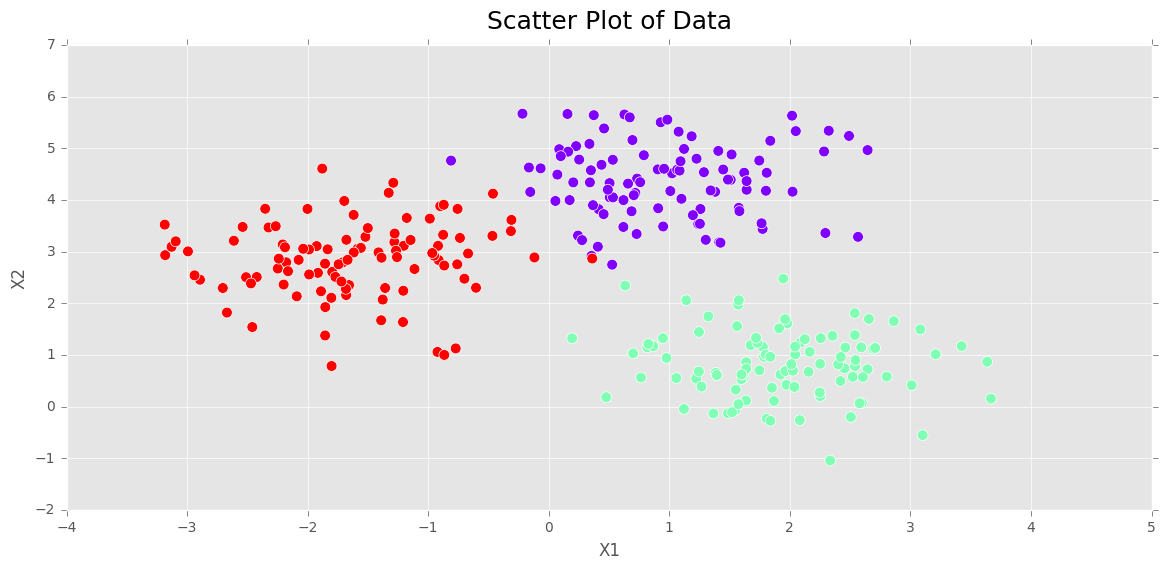

In [39]:
def get_data(samples,centroids,std):
    
    """
    Return Toy Dataset with N number of clusters
    
    Keyword arguments:
    samples -- sample size
    centroid -- number of clusters
    std -- stddev within clusters
    """
    
    #Make toy dataset
    X,y = make_blobs(n_samples=samples,centers=centroids,random_state=0, cluster_std=std)
    
    #Setup Visualization
    plt.figure(figsize=(14,6))
    plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=60,edgecolor='w')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of Data',fontsize=18,y=1.02)
    return(X,y)

X,y = get_data(300,3,0.70)

### Tuning SVM Hyperparameters

- In  the code below, we will create a decision boundary for the Support Vector Machine Classifier. Here we will explore how the decison boundary changes while adjusting for various tuning parameters. 


- For instance, one tuning parameter would be 'C', the penalty parameter C of the error term. Basically, C controls the tradeoff between a smooth decision boundary and classifying training points correctly. The higher the C value, the more intricate the decision boundary becomes. Furthermore, 'Gamma' defines how far the influence of a single training example reaches; low values meaning ‘far’ and high values meaning ‘close’. If the value of gamma is too small then the model is too constrained and cannot capture the complexity or “shape” of the data.

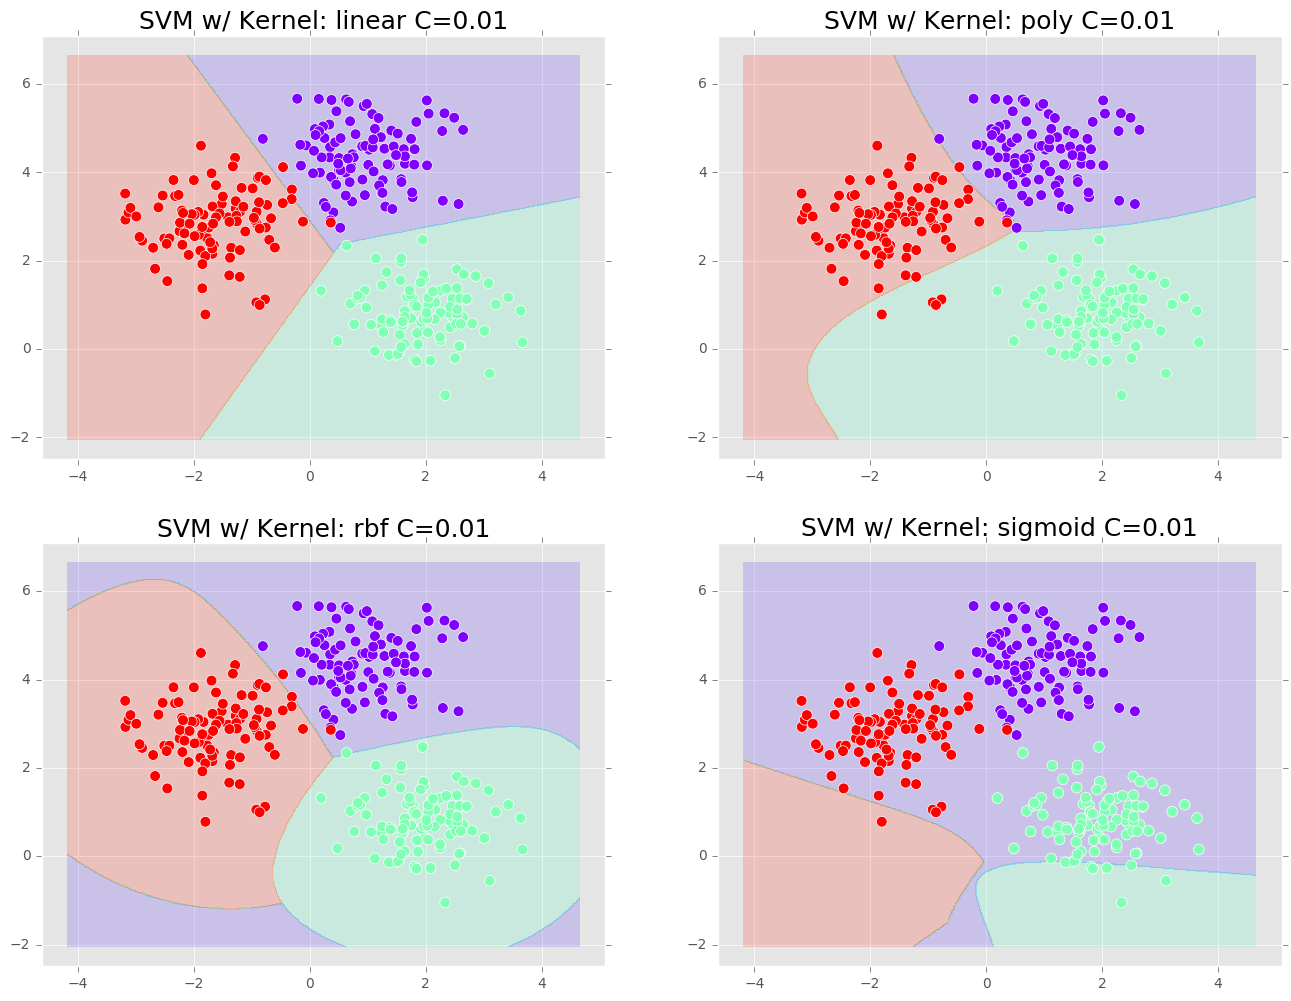

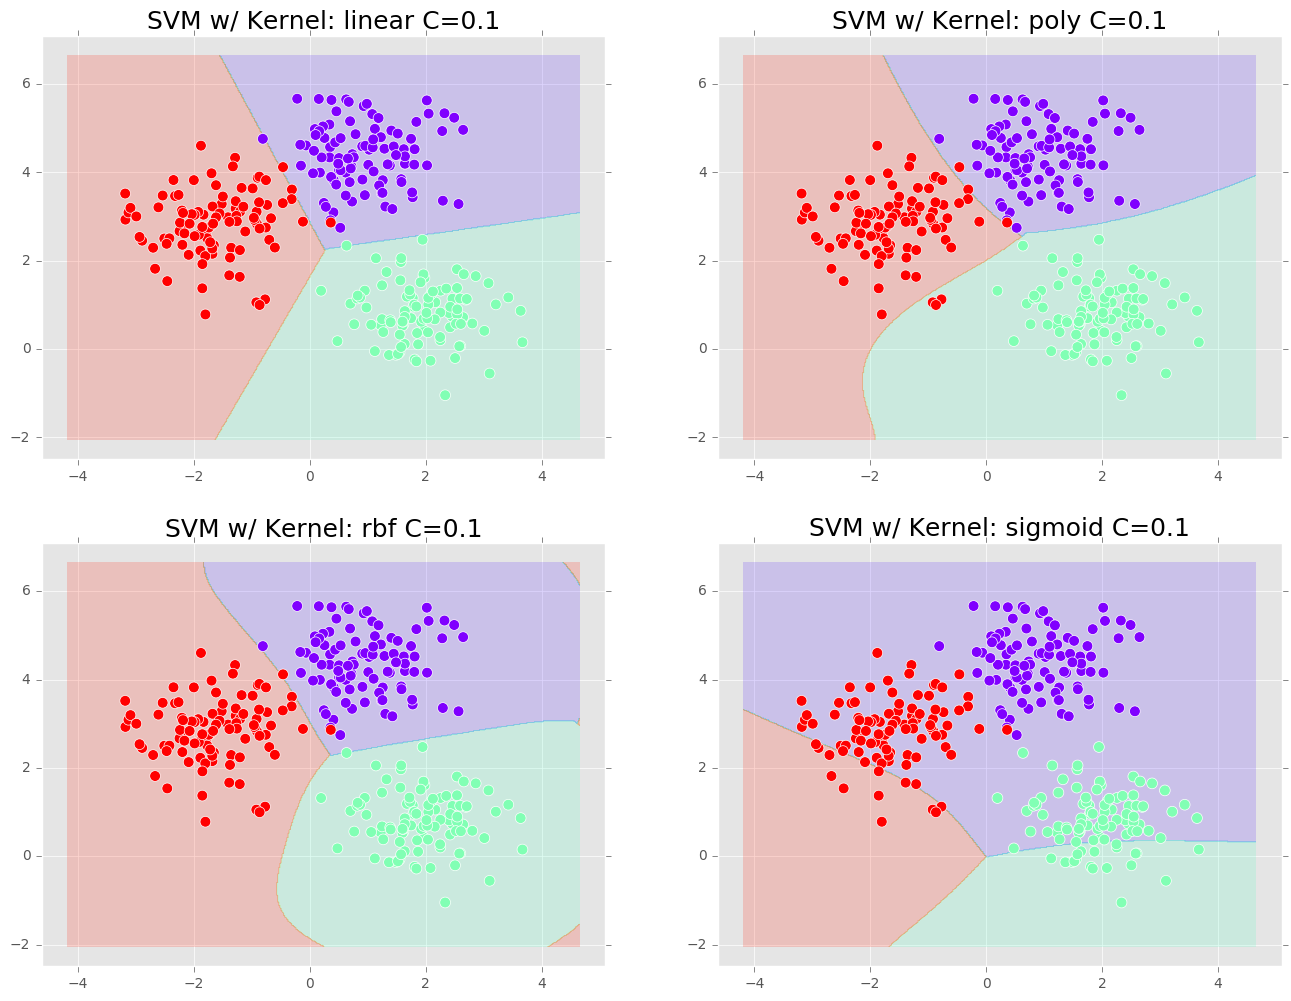

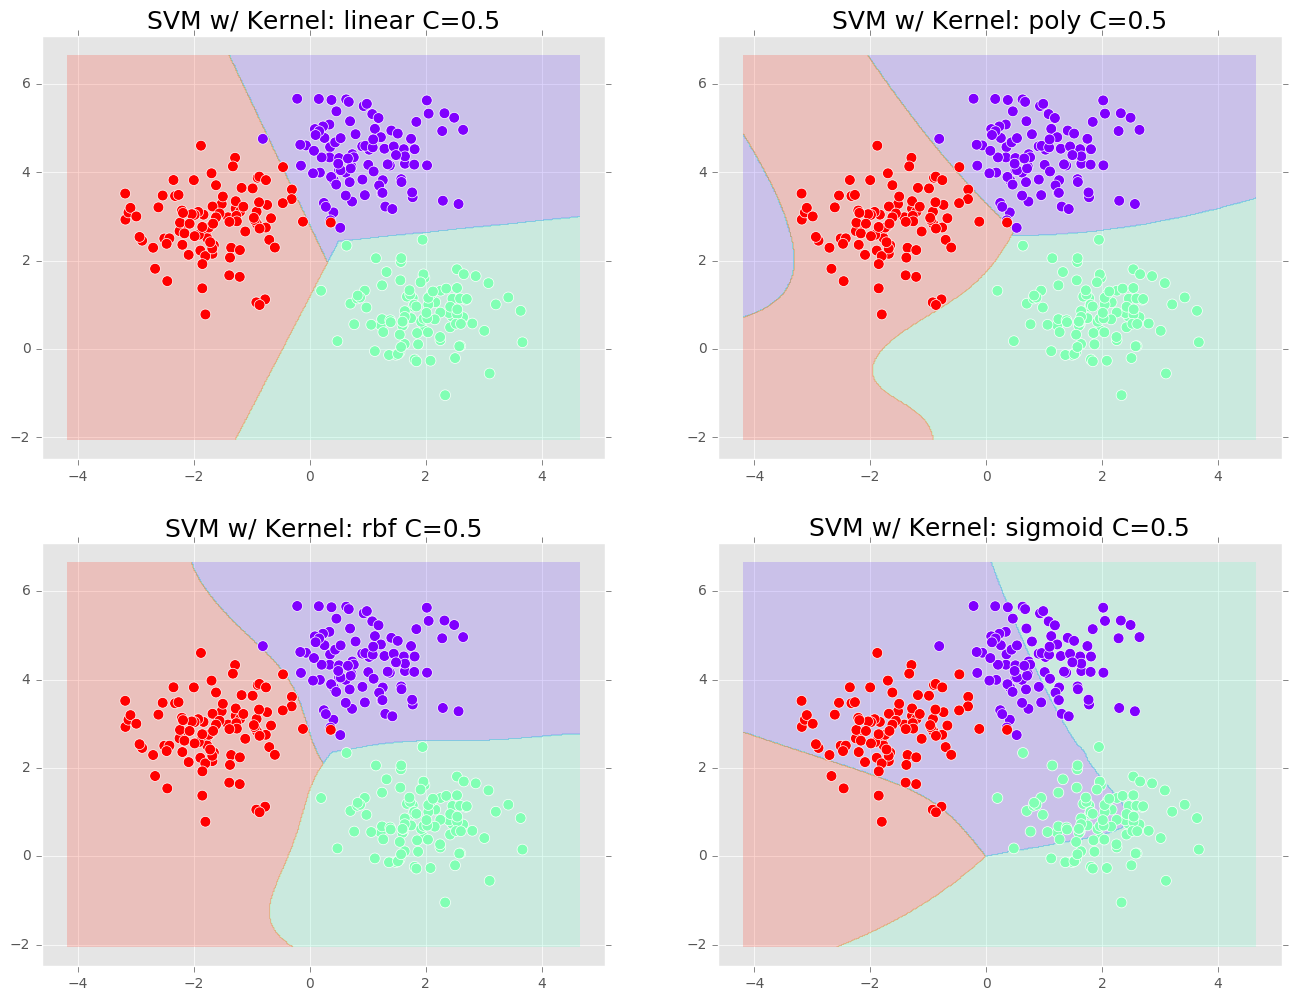

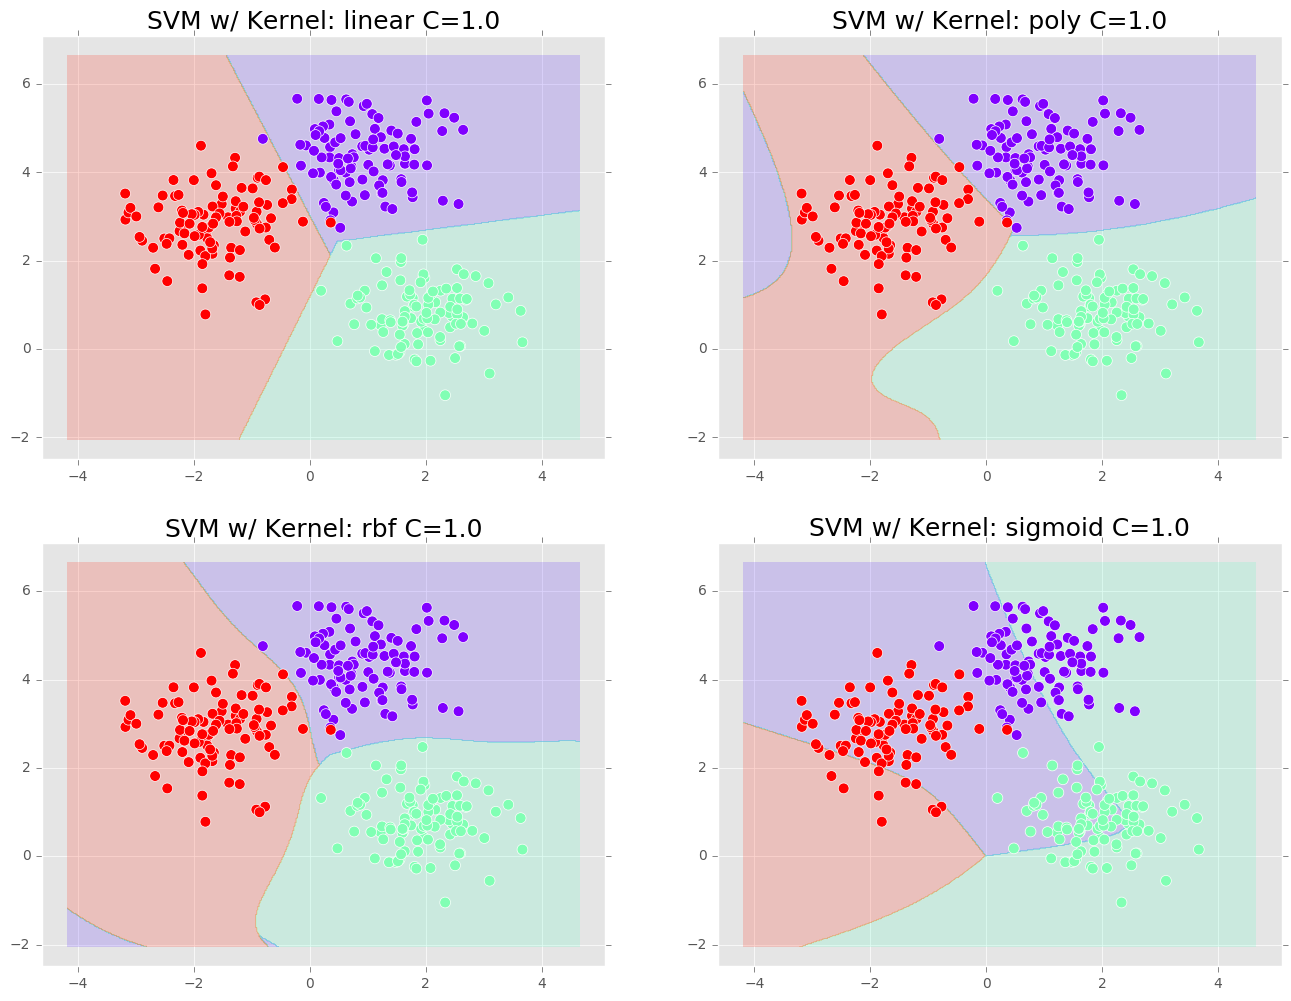

In [40]:
def create_mesh(X):
    
    """
    Create Mesh Grid
    
    Keyword arguments:
    X -- input original features
    """
   
    #Get Features
    X1,X2 = X[:,0],X[:,1]
    
    #Create mesh of all points in data
    x1_min,x1_max = X1.min() -1, X1.max() +1
    x2_min,x2_max = X2.min() -1, X2.max() +1
    xx,yy = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
    return(xx,yy)
    
    return(X,xx,yy)

def decision_boundary(ax,clf,X,label,**params):
    
    """
    Return Decision Boundary Visual
    
    Keyword arguments:
    ax -- axis for subplot
    clf -- SVC classifier
    X -- input original features
    label -- tuple of kernel and C labels
    **params -- plotting properties
    
    """
    xx,yy = create_mesh(X)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    ax.contourf(xx,yy,Z.reshape(xx.shape),**params)
    ax.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=60,edgecolor='w')
    ax.set_title('SVM w/ Kernel: {} C={}'.format(label[0],label[1]),fontsize=18)
    
def train_model(X,y,c,*args):
    
    """
    Train SVM Classifier and Return Visual of Decision Boundary
    
    """

    n_col = 2
    n_row = np.ceil(len(args) / n_col)
    fig = plt.figure(figsize=(8*n_col,6*n_row))
    for idx,k in enumerate(args):
        clf = SVC(kernel=k, C=c)
        clf.fit(X,y)
        ax = fig.add_subplot(n_row,n_col,idx+1)
        labels = (k,c)
        decision_boundary(ax,clf,X,labels,cmap='rainbow',alpha=0.20)
    

#Tune various values for 'C' w/ different Kernels
if __name__ == '__main__':
    
    for c in [0.01,0.10,0.50,1.0]:
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        train_model(X,y,c,*kernels)
    

### Example of Non-Linear Separable Data

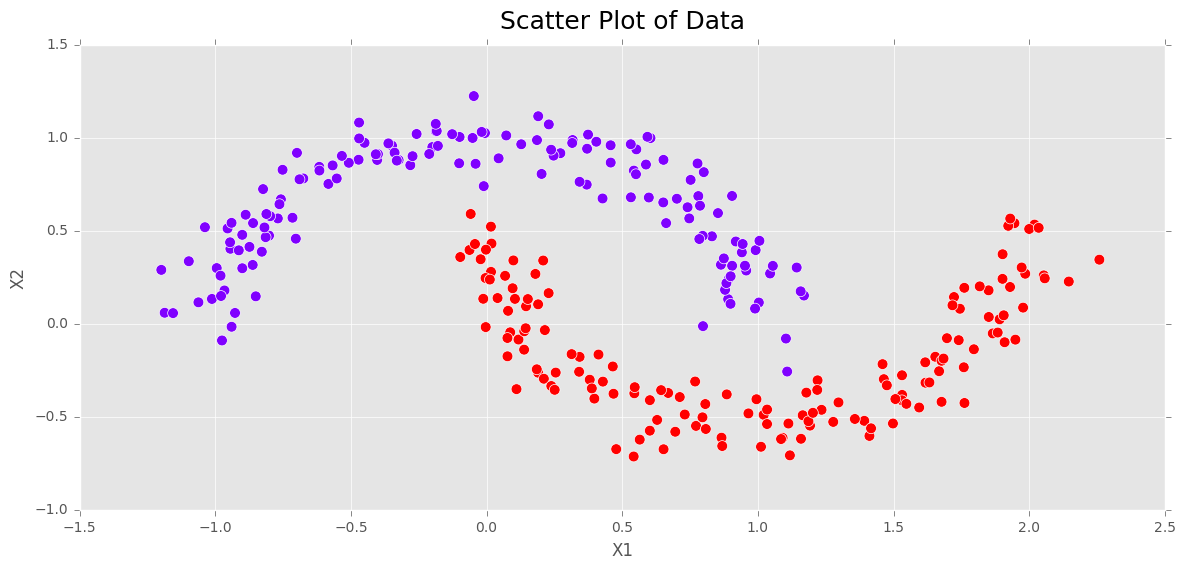

In [42]:
def get_non_linear_data(samples,noise):
        
    """
    Return Toy Dataset with N number of moons -- Nonlinear Dataset
    
    Keyword arguments:
    samples -- sample size
    noise -- stddev within each class

    """
    
    #Make toy data
    X,y = make_moons(n_samples=samples,noise=noise,random_state=0)
    
    #Setup Visualization
    plt.figure(figsize=(14,6))
    plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=60,edgecolor='w')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of Data',fontsize=18,y=1.02)
    return(X,y)

X,y = get_non_linear_data(300,0.10)

- The decision boundary of a linear SVM classifier is shown below. Clearly, the data is not linearly separable, and thus the model does a poor job of separating the two classes.


- We need to find a transformation such that when transforming the data in a higher dimensional space it becomes linearly separable; hence applying the kernel trick. Note, the hyperplane then becomes non-linear when projected back to the original space. 

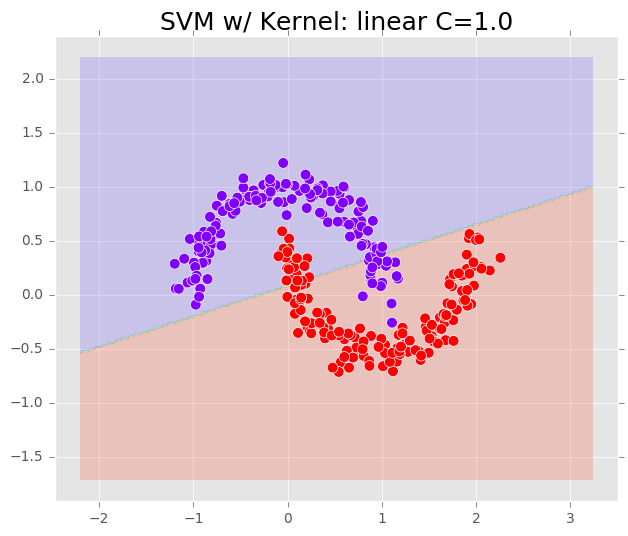

In [43]:
for c in [1.0]:
        kernels = ['linear']
        train_model(X,y,c,*kernels)

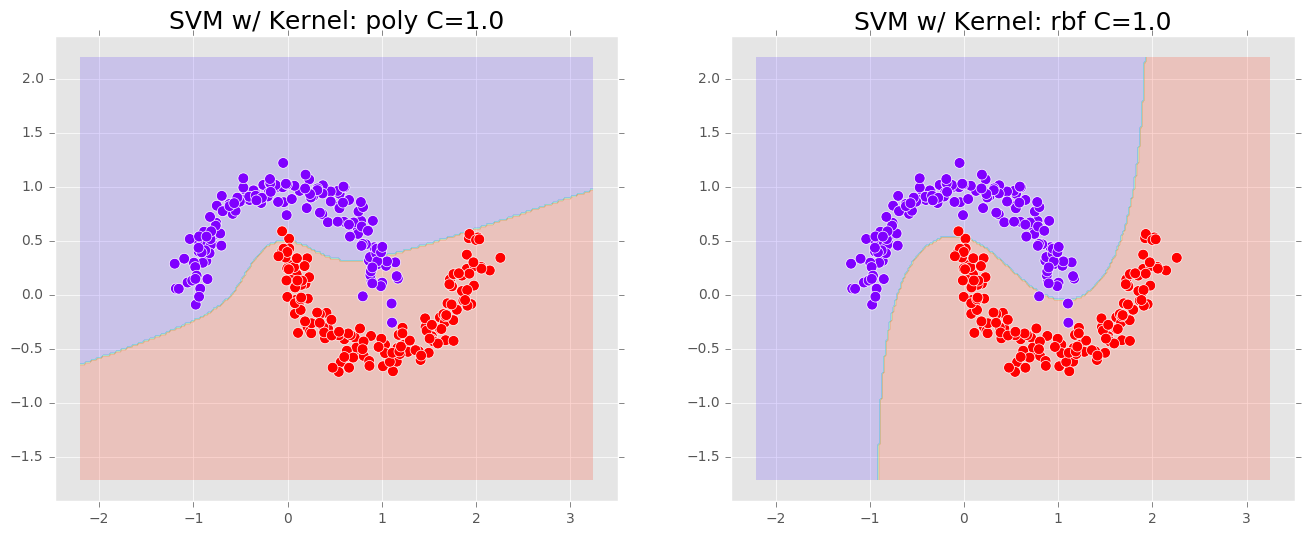

In [44]:
for c in [1.0]:
        kernels = ['poly','rbf']
        train_model(X,y,c,*kernels)